In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('D:/Real_Estate_Business_Project/datasets/gurgaon_properties_outlier_treated.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.72,6660.0,1081.0,Super Built up area 1081(100.43 sq.m.),3,2,3,3.0,NaN,Under Construction,1081.0,NaN,NaN,0,0,0,0,0,1,0,360.333333
1,flat,emaar gurgaon greens,sector 102,1.42,8606.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,3,3,4.0,North,Relatively New,1650.0,NaN,1022.0,0,0,0,0,1,1,49,550.000000
2,flat,dlf regency park,sector 28,2.35,13225.0,1777.0,Super Built up area 1777(165.09 sq.m.)Built Up...,3,4,3,8.0,South-East,Old Property,1777.0,1700.0,1600.0,0,1,0,0,0,0,109,592.333333
3,flat,tulip violet,sector 69,3.05,9664.0,3156.0,Super Built up area 3156(293.2 sq.m.),4,5,3+,14.0,South-West,Relatively New,3156.0,NaN,NaN,0,1,0,0,1,1,49,789.000000
4,flat,emaar imperial gardens,sector 102,1.98,9900.0,2000.0,Carpet area: 2000 (185.81 sq.m.),3,3,3+,9.0,North,Relatively New,NaN,NaN,2000.0,0,1,0,0,0,0,72,666.666667


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

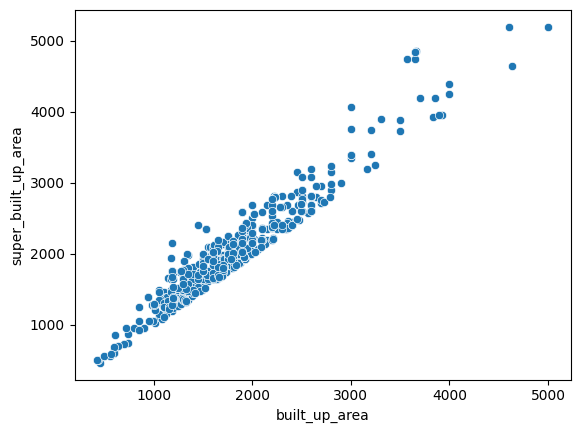

In [7]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area']) # strong linear relationship

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

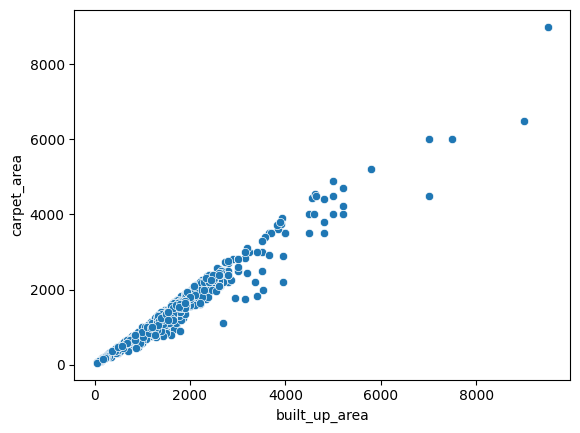

In [8]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area']) # strong linear relationship

In [9]:
# no row contains all 3 missing values 
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [10]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [11]:
all_present_df.shape

(531, 24)

In [12]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [13]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [14]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [15]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [16]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,emaar gurgaon greens,sector 102,1.42,8606.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,3,3,4.0,North,Relatively New,1650.0,NaN,1022.00,0,0,0,0,1,1,49,550.000000
7,flat,eldeco accolade,sohna road,0.87,5963.0,1459.0,Super Built up area 1457(135.36 sq.m.)Carpet a...,2,2,3+,10.0,NaN,Relatively New,1457.0,NaN,849.00,1,0,0,0,0,1,72,729.500000
27,flat,mapsko mount ville,sector 79,1.28,8556.0,1496.0,Super Built up area 1490(138.43 sq.m.)Carpet a...,3,3,3,16.0,South,Relatively New,1490.0,NaN,1063.91,1,0,0,0,0,0,128,498.666667
29,flat,pivotal devaan,sector 84,0.37,6346.0,583.0,Super Built up area 583(54.16 sq.m.)Carpet are...,2,2,1,5.0,North-West,Relatively New,583.0,NaN,483.00,0,0,0,0,0,1,73,291.500000
38,flat,signature global solera,sector 107,0.30,6135.0,489.0,Super Built up area 602(55.93 sq.m.)Carpet are...,2,2,1,5.0,East,Relatively New,602.0,NaN,489.00,0,0,0,0,0,1,57,244.500000


In [17]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_2496\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [18]:
df.update(sbc_df)

In [19]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [20]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [21]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.72,6660.0,1081.0,Super Built up area 1081(100.43 sq.m.),3,2,3,3.0,NaN,Under Construction,1081.0,NaN,NaN,0,0,0,0,0,1,0,360.333333
3,flat,tulip violet,sector 69,3.05,9664.0,3156.0,Super Built up area 3156(293.2 sq.m.),4,5,3+,14.0,South-West,Relatively New,3156.0,NaN,NaN,0,1,0,0,1,1,49,789.000000
5,flat,dlf the skycourt,sector 86,1.60,8294.0,1929.0,Super Built up area 1929(179.21 sq.m.),3,3,1,14.0,North-East,Relatively New,1929.0,NaN,NaN,0,0,0,1,0,1,72,643.000000
8,flat,bestech park view spa next,sector 67,2.35,12145.0,1935.0,Super Built up area 1935(179.77 sq.m.),3,4,3+,14.0,South-West,Moderately Old,1935.0,NaN,NaN,0,1,0,0,0,0,156,645.000000
15,flat,puri diplomatic greens,sector 111,3.65,12373.0,2950.0,Super Built up area 2950(274.06 sq.m.),4,5,3+,17.0,West,Moderately Old,2950.0,NaN,NaN,0,1,0,0,0,1,132,737.500000


In [22]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_2496\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [23]:
df.update(sb_df)

In [24]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [25]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [26]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
4,flat,emaar imperial gardens,sector 102,1.98,9900.0,2000.0,Carpet area: 2000 (185.81 sq.m.),3,3,3+,9.0,North,Relatively New,NaN,NaN,2000.0,0,1,0,0,0,0,72,666.666667
9,flat,nul,gwal pahari,0.56,6054.0,925.0,Carpet area: 925 (85.94 sq.m.),2,2,1,11.0,NaN,Old Property,NaN,NaN,925.0,0,0,0,0,0,0,0,462.500000
12,flat,godrej summit,sector 104,1.35,5015.0,2692.0,Carpet area: 2692 (250.09 sq.m.),4,5,3+,0.0,South-East,Relatively New,NaN,NaN,2692.0,1,1,1,1,0,1,88,673.000000
17,flat,breez global heights,sohna road,0.46,6479.0,710.0,Carpet area: 710 (65.96 sq.m.),2,2,2,6.0,East,Relatively New,NaN,NaN,710.0,0,0,0,0,0,2,49,355.000000
24,flat,om appartments,sector 3 phase 2,0.40,4444.0,900.0,Carpet area: 900 (83.61 sq.m.),3,2,1,3.0,NaN,Relatively New,NaN,NaN,900.0,0,0,0,0,0,1,7,300.000000


In [27]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_2496\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [28]:
df.update(c_df)

In [29]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

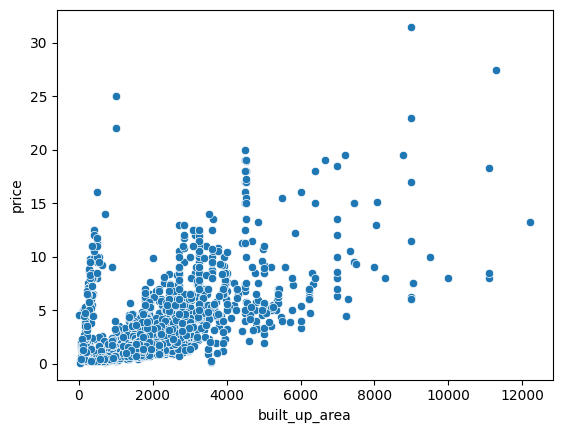

In [31]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [32]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [33]:
anamoly_df.sample(5)

,price,area,built_up_area
1104,3.95,2343.0,1900.0
3508,6.50,1836.0,215.0
1143,2.65,1582.0,138.0
1931,3.30,1665.0,1665.0
2916,4.45,1265.0,150.0


In [34]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [35]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

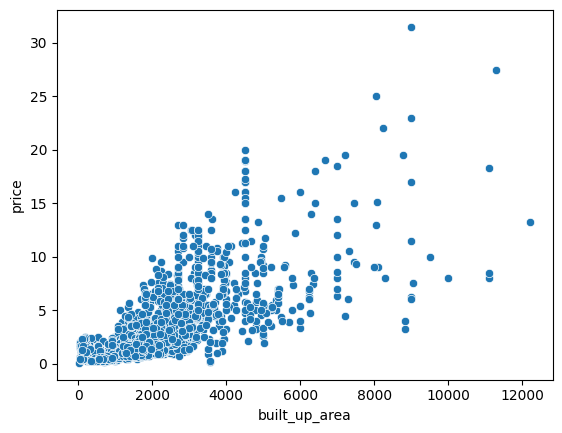

In [37]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [38]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [39]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.72,6660.0,3,2,3,3.0,NaN,Under Construction,978.0,0,0,0,0,0,1,0
1,flat,emaar gurgaon greens,sector 102,1.42,8606.0,3,3,3,4.0,North,Relatively New,1314.0,0,0,0,0,1,1,49
2,flat,dlf regency park,sector 28,2.35,13225.0,3,4,3,8.0,South-East,Old Property,1700.0,0,1,0,0,0,0,109
3,flat,tulip violet,sector 69,3.05,9664.0,4,5,3+,14.0,South-West,Relatively New,2856.0,0,1,0,0,1,1,49
4,flat,emaar imperial gardens,sector 102,1.98,9900.0,3,3,3+,9.0,North,Relatively New,2222.0,0,1,0,0,0,0,72


In [40]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [41]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
356,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,1,0
475,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,1,9
478,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,1,0
545,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,1,0
649,house,dlf new town heights,sector 86,2.47,7719.0,4,4,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,0,130
1111,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Relatively New,5200.0,0,1,1,1,0,0,114
1665,house,independent,sector 24,1.45,2984.0,3,3,1,NaN,NaN,Old Property,540.0,0,0,0,0,0,1,9
1793,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,1,0
1867,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,1,21
2797,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,1,0


In [42]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [43]:
df['floorNum'].fillna(2.0,inplace=True)

In [44]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [45]:
1011/df.shape[0]

0.2843881856540084

### facing

<Axes: ylabel='count'>

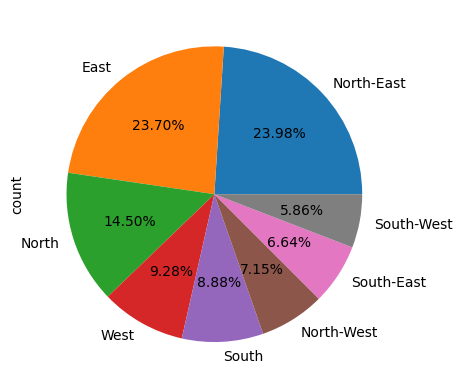

In [46]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [47]:
df.drop(columns=['facing'],inplace=True)

In [48]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
123,flat,zara aavaas,sector 104,0.22,7309.0,1,2,2,2.0,New Property,335.0,0,0,0,0,0,1,60
3221,flat,"new colony, gurgaon",sector 7,0.80,8097.0,3,2,1,4.0,Relatively New,1100.0,0,0,0,0,0,0,69
1626,flat,mapsko mount ville,sector 79,1.55,8540.0,3,4,3,11.0,Relatively New,1416.0,0,1,0,0,0,0,152
2688,house,not applicable,sector 4,0.80,6088.0,5,4,3,3.0,Under Construction,146.0,0,0,0,0,0,1,0
841,flat,m3m heights,sector 65,1.99,15794.0,2,2,2,26.0,Under Construction,1140.0,0,0,0,0,0,1,48


In [49]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [50]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2824,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,1,0


In [51]:
df.drop(index=[2824],inplace=True)

In [52]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [53]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     263
Name: count, dtype: int64

In [54]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,flat,ild grand,sector 37c,0.66,5038.0,2,2,3+,14.0,Undefined,1310.0,0,0,0,0,0,1,60
18,flat,umang monsoon breeze,sector 78,0.70,5719.0,2,2,2,5.0,Undefined,1224.0,0,0,0,0,0,1,0
41,flat,aipl zen residences,sector 70a,1.25,9905.0,2,2,3,19.0,Undefined,1402.0,0,0,0,0,0,1,0
52,flat,lavanya apartments,sector 81,0.90,5056.0,3,3,0,7.0,Undefined,1780.0,0,0,0,0,0,1,0
58,house,unitech escape,sector 50,12.00,37037.0,5,6,3+,3.0,Undefined,3240.0,0,0,0,0,0,1,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3491,house,signature global city 92,sector 92,0.75,7821.0,2,2,3,1.0,Undefined,959.0,0,0,0,0,0,1,46
3497,house,independent,sector 67,3.00,11905.0,4,4,0,3.0,Undefined,2800.0,0,0,0,0,0,1,0
3506,house,independent,sector 41,1.65,13750.0,1,1,0,1.0,Undefined,1200.0,0,0,0,0,0,1,0
3536,flat,signature global park,sohna road,0.55,6691.0,2,2,3,3.0,Undefined,913.0,0,0,0,0,0,1,58


In [55]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [56]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [57]:
df['agePossession'].value_counts()

agePossession
Relatively New        1717
New Property           597
Moderately Old         584
Old Property           326
Under Construction     277
Undefined               53
Name: count, dtype: int64

In [58]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [59]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [60]:
df['agePossession'].value_counts()

agePossession
Relatively New        1726
New Property           598
Moderately Old         591
Old Property           329
Under Construction     277
Undefined               33
Name: count, dtype: int64

In [61]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [62]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [63]:
df['agePossession'].value_counts()

agePossession
Relatively New        1728
Moderately Old         622
New Property           598
Old Property           329
Under Construction     277
Name: count, dtype: int64

In [64]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [ ]:
df.to_csv('D:/Real_Estate_Business_Project/datasets/gurgaon_properties_missing_value_imputation.csv',index=False)

In [67]:
df.shape

(3554, 18)